# **1. Data Requirements** <a class="anchor" id="5"></a>



Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

These files contain complete loan data for all loans issued through the 2007-2014, including the current loan status (Current, Charged-off, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter.

# **2. Data Collection** <a class="anchor" id="5"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
%matplotlib inline

import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/loan_data_2007_2014.csv')
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


# **3. Data Understanding** <a class="anchor" id="5"></a>



In [5]:
# preview the dataset

df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# view dimensions of dataset

df.shape

(466285, 75)

In [7]:
# view columns of dataset

df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [8]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# **4. Data Preparation** <a class="anchor" id="5"></a>



In [9]:
#cek data duplicated

df.duplicated().sum()

0

In [10]:
# cek missing value

df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [11]:
# print variables in dataset containing missing values

df_loan = [var for var in df if df[var].isnull().sum()!=0]

print(df[df_loan].isnull().sum())

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340302
title                              20
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    466285
open_il_6m  

In [12]:
# remove all the rows that contain a missing value

df.dropna()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


In [13]:
# remove all columns with at least one missing value

columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1,INDIVIDUAL
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1,INDIVIDUAL
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1,INDIVIDUAL
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1,INDIVIDUAL


In [14]:
# just how much data did we lose?

print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 75 

Columns with na's dropped: 35


In [15]:
# cek missing value after being columns with na's dropped

loan_data = columns_with_na_dropped.isnull().sum()
loan_data

Unnamed: 0                 0
id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
revol_bal                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
policy_code                0
application_ty

In [16]:
# loan_data is the same as columns_with_na_dropped

loan_data = columns_with_na_dropped
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1,INDIVIDUAL
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1,INDIVIDUAL
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1,INDIVIDUAL
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64,1,INDIVIDUAL
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50,1,INDIVIDUAL
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34,1,INDIVIDUAL
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,1500.68,1,INDIVIDUAL


In [17]:
# view columns of loan_data

loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'revol_bal', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'application_type'],
      dtype='object')

In [18]:
# view dimensions of loan_data

loan_data.shape

(466285, 35)

In [19]:
# cek loan_data status with value count

loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [20]:
# change loan_status

loan_data['loan_status'] = loan_data['loan_status'].replace(['Late (31-120 days)', 'Late (16-30 days)','Default', 'In Grace Period', 'Does not meet the credit policy. Status:Charged Off', 'Current', 'Does not meet the credit policy. Status:Fully Paid'], ['Charged Off', 'Charged Off', 'Charged Off', 'Charged Off', 'Charged Off','Fully Paid', 'Fully Paid'])


In [21]:
# cek loan_data status with value count after changing loan_status

loan_data['loan_status'].value_counts()

Fully Paid     410953
Charged Off     55332
Name: loan_status, dtype: int64

# **5. Exploratory Data Analysis** <a class="anchor" id="5"></a>

In [22]:
loan_status = loan_data['loan_status'].value_counts().head(20)

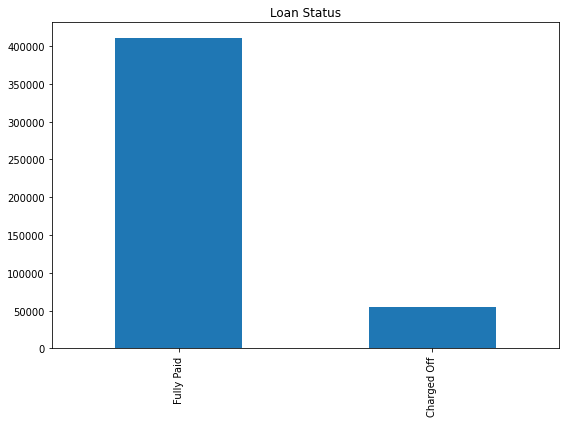

In [23]:
# visualize data loan_status to bar chart

plt.figure(figsize=(20,6))

plt.subplot(1,2,2)
loan_status.plot(kind='bar')
plt.title('Loan Status')

plt.show()

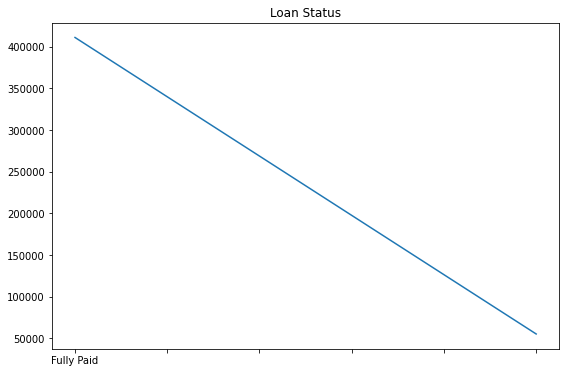

In [24]:
# visualize data loan_status to line chart

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
loan_status.plot(kind='line')
plt.title('Loan Status')

plt.show()

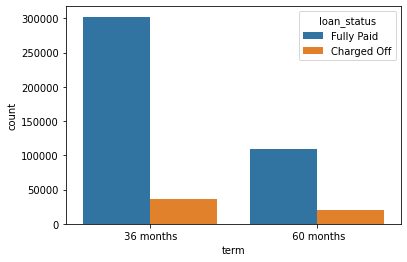

In [25]:
# visualize data loan_status by term

sns.countplot(data=loan_data,
              x='term',
              hue='loan_status')

plt.show()

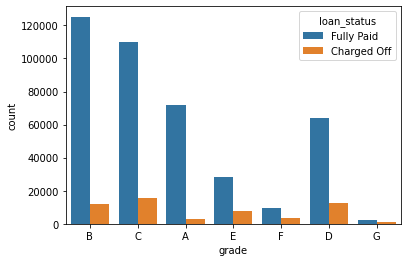

In [26]:
# visualize data loan_status by grade

sns.countplot(data=loan_data,
              x='grade',
              hue='loan_status')

plt.show()